# Visualize realsense result to pointcloud

In [1]:
import numpy as np
import pyrealsense2 as rs
import cv2

from utilities import getDepthScale, removeMaskNoise, getIntrinsic, deprojectPixelToPoints

### Read Data from RealSense

In [3]:
pipeline = rs.pipeline()

# Configuration
config   = rs.config()
config.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16 , 30)
config.enable_stream(rs.stream.color, 1280, 720, rs.format.bgr8, 30)

# Initialize RealSense pipeline
profile  = pipeline.start(config)

# Camera configuration from pipeline
metadata = {
    "scale": getDepthScale(profile),
    "align": rs.align(rs.stream.color),
    "intrinsic": getIntrinsic(profile)
}

align = metadata["align"]
scale = metadata["scale"]
rs_K  = metadata["intrinsic"]

frame = pipeline.wait_for_frames()

pipeline.stop()

In [4]:
# depth to color alignment
aligned_frames = align.process(frame)

depth = aligned_frames.get_depth_frame()
color = aligned_frames.get_color_frame()

depth_arr = np.asanyarray(depth.get_data()) # np.array [720 x 1280    ] dtype = uint16
color_arr = np.asanyarray(color.get_data()) # np.array [720 x 1280 x 3] dtype = uint8

### Visualize the Frame Read

In [2]:
import matplotlib.pyplot as plt
import open3d as o3d

ModuleNotFoundError: No module named 'open3d'

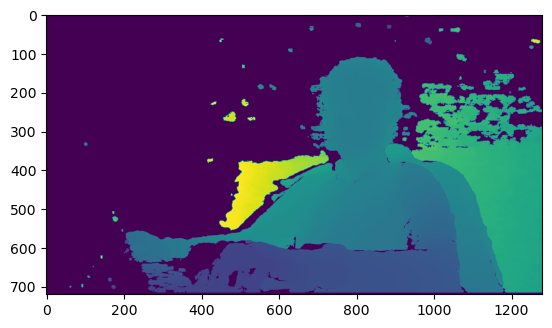

In [ ]:
def mask_depth_array(depth_arr, min_val, max_val):
    return np.where((depth_arr < min_val) | (depth_arr > max_val), 0, depth_arr)

plt.imshow(mask_depth_array(depth_arr, 1, 2000))

In [ ]:
color_intrinsic = metadata["intrinsic"][0]